<a href="https://colab.research.google.com/github/Shankjbs571/Valora/blob/main/AmazonOCR_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import multiprocessing

num_cores = multiprocessing.cpu_count()

print(f"Number of CPU cores: {num_cores}")


Number of CPU cores: 2


In [ ]:
!pip install paddlepaddle paddleocr opencv-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.4/88.4 kB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 407.5/407.5 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 18.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 27.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.3/244.3 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 21.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 3.6 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.6.0-py2.py3-none-any.whl size=117030 sha256=666e6a538d0aad09fc8ee26da60d13647c40deb42fced1c4910494d8f96ebdf5
  Stored in di

In [ ]:
import pandas as pd
from google.colab import files

uploaded = files.upload()
for file_name in uploaded.keys():
    test_df = pd.read_csv(file_name)

Saving sample_test.csv to sample_test.csv
   index                                         image_link  group_id  \
0      0  https://m.media-amazon.com/images/I/41-NCxNuBx...    658003   
1      1  https://m.media-amazon.com/images/I/41-NCxNuBx...    658003   
2      2  https://m.media-amazon.com/images/I/417NJrPEk+...    939426   
3      3  https://m.media-amazon.com/images/I/417SThj+Sr...    276700   
4      4  https://m.media-amazon.com/images/I/417SThj+Sr...    276700   

                     entity_name  
0                          width  
1                          depth  
2  maximum_weight_recommendation  
3                        voltage  
4                        wattage  


In [ ]:
import re
import cv2
import requests
import numpy as np
from paddleocr import PaddleOCR
from matplotlib import pyplot as plt

ocr = PaddleOCR(use_angle_cls=True, lang='en')

def download_image(image_url):
    response = requests.get(image_url, stream=True)
    if response.status_code == 200:
        image_data = np.asarray(bytearray(response.content), dtype="uint8")
        img = cv2.imdecode(image_data, cv2.IMREAD_COLOR)
        return img
    else:
        print(f"Failed to download image from {image_url}")
        return None

def display_image(img):
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

patterns = {
    #'weight': r'([0-9]+(?:\.[0-9]+)?\s?(g|kg|mg))',
    #'volume': r'([0-9]+(?:\.[0-9]+)?\s?(ml|L))',
    #'voltage': r'([0-9]+(?:\.[0-9]+)?\s?V)',
    #'wattage': r'([0-9]+(?:\.[0-9]+)?\s?W)',
    'length': r'([0-9]+(?:\.[0-9]+)?\s?(mm|cm|m|km|centimetre|foot|millimetre|metre|inch|yard|in|ft|\'|\"))',
    'width': r'([0-9]+(?:\.[0-9]+)?\s?(mm|cm|m|km|centimetre|foot|millimetre|metre|inch|yard|in|ft|\'|\"))',
    'depth': r'([0-9]+(?:\.[0-9]+)?\s?(mm|cm|m|km|centimetre|foot|millimetre|metre|inch|yard|in|ft|\'|\"))',
    'height': r'([0-9]+(?:\.[0-9]+)?\s?(mm|cm|m|km|centimetre|foot|millimetre|metre|inch|yard|in|ft|\'|\"))',
    'item_weight': r'([0-9]+(?:\.[0-9]+)?\s?(mg|g|kg|tonne|lb|lbs|oz|ounce|milligram|kilogram|microgram|gram|ounce|ton|pound))',
    'volume': r'([0-9]+(?:\.[0-9]+)?\s?(ml|l|liter|litre|gallon|qt|quart|pint|fl oz|cubic foot|microlitre|cup|fluid ounce|centilitre|imperial gallon|pint|decilitre|litre|millilitre|quart|cubic inch|gallon))',
    'voltage': r'([0-9]+(?:\.[0-9]+)?\s?(V|kV|volt|kilovolt|millivolt))',
    'wattage': r'([0-9]+(?:\.[0-9]+)?\s?(W|kW|MW|watt|kilowatt|megawatt))',
    #'dimensions': r'([0-9]+(?:\.[0-9]+)?\s?(x|\*)\s?[0-9]+(?:\.[0-9]+)?\s?(x|\*)\s?[0-9]+(?:\.[0-9]+)?\s?(mm|cm|m|in|inch|feet|ft))',
    #'current': r'([0-9]+(?:\.[0-9]+)?\s?(A|mA|amp|ampere))',
    #'frequency': r'([0-9]+(?:\.[0-9]+)?\s?(Hz|kHz|MHz|hertz|kilohertz|megahertz))',
    #'pressure': r'([0-9]+(?:\.[0-9]+)?\s?(Pa|kPa|bar|psi))',
    #'temperature': r'([0-9]+(?:\.[0-9]+)?\s?(°C|°F|K|celsius|fahrenheit|kelvin))'
}

def extract_info(ocr_result, patterns):
    extracted_data = {}

    for result in ocr_result:
        for line in result:
            text = line[1][0]
            confidence = line[1][1]

            if confidence < 0.6:
                continue

            for field, pattern in patterns.items():
                match = re.search(pattern, text, re.IGNORECASE)
                if match:
                    extracted_data[field] = match.group(0)

    return extracted_data


[2024/09/15 09:16:27] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/root/.paddleocr/whl/rec/en/en_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_length=25, rec_c

In [ ]:
import csv

def create_predictions_csv(predictions):
    with open('predictions.csv', mode='w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(['index', 'prediction'])
        writer.writerows(predictions)

def make_predictions(test_df):
    predictions = []
    for idx, row in test_df.iterrows():

        image_url = row['image_link']
        entity_name = row['entity_name']

        image = download_image(image_url)
        ocr_result = ocr.ocr(image)
        extracted_data = extract_info(ocr_result, patterns)

        predictions.append([row['index'], extracted_data.get(entity_name,"")])
    return predictions

[2024/09/15 09:18:19] ppocr DEBUG: dt_boxes num : 2, elapsed : 0.29700613021850586
[2024/09/15 09:18:19] ppocr DEBUG: cls num  : 2, elapsed : 0.010422229766845703
[2024/09/15 09:18:20] ppocr DEBUG: rec_res num  : 2, elapsed : 0.11928272247314453
[2024/09/15 09:18:20] ppocr DEBUG: dt_boxes num : 2, elapsed : 0.30081701278686523
[2024/09/15 09:18:20] ppocr DEBUG: cls num  : 2, elapsed : 0.011024951934814453
[2024/09/15 09:18:20] ppocr DEBUG: rec_res num  : 2, elapsed : 0.1019887924194336
[2024/09/15 09:18:20] ppocr DEBUG: dt_boxes num : 9, elapsed : 0.09209299087524414
[2024/09/15 09:18:20] ppocr DEBUG: cls num  : 9, elapsed : 0.0554661750793457
[2024/09/15 09:18:21] ppocr DEBUG: rec_res num  : 9, elapsed : 1.0561974048614502
[2024/09/15 09:18:22] ppocr DEBUG: dt_boxes num : 17, elapsed : 0.24524664878845215
[2024/09/15 09:18:22] ppocr DEBUG: cls num  : 17, elapsed : 0.06937456130981445
[2024/09/15 09:18:23] ppocr DEBUG: rec_res num  : 17, elapsed : 1.3604373931884766
[2024/09/15 09:18:2

In [ ]:
pred = make_predictions(test_df)
create_predictions_csv(pred)

In [ ]:
urls = ['https://m.media-amazon.com/images/I/41-NCxNuBxL.jpg',
'https://m.media-amazon.com/images/I/417NJrPEk+L.jpg',
'https://m.media-amazon.com/images/I/417SThj+SrL.jpg',
'https://m.media-amazon.com/images/I/41ADVPQgZOL.jpg',
'https://m.media-amazon.com/images/I/41nblnEkJ3L.jpg',
'https://m.media-amazon.com/images/I/41o3iis9E7L.jpg',
'https://m.media-amazon.com/images/I/41pvwR9GbaL.jpg',
'https://m.media-amazon.com/images/I/41uwo4PVnuL.jpg',
'https://m.media-amazon.com/images/I/61I9XdN6OFL.jpg',]

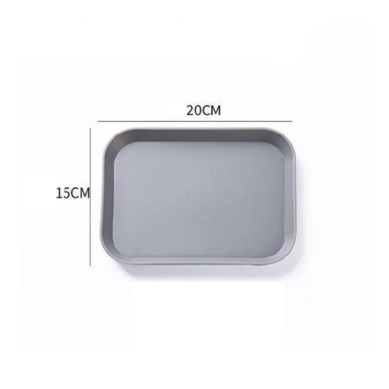

[2024/09/15 09:16:39] ppocr DEBUG: dt_boxes num : 2, elapsed : 0.36242008209228516
[2024/09/15 09:16:39] ppocr DEBUG: cls num  : 2, elapsed : 0.03413844108581543
[2024/09/15 09:16:40] ppocr DEBUG: rec_res num  : 2, elapsed : 0.10689711570739746
Extracted Entity Data: {'length': '15CM', 'width': '15CM', 'depth': '15CM', 'height': '15CM'}


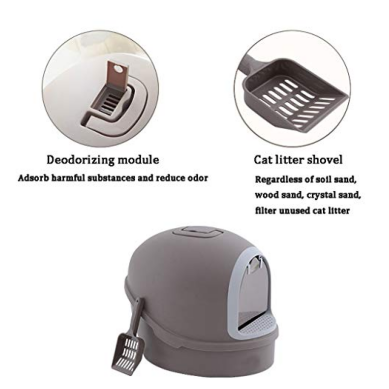

[2024/09/15 09:16:40] ppocr DEBUG: dt_boxes num : 9, elapsed : 0.2179584503173828
[2024/09/15 09:16:40] ppocr DEBUG: cls num  : 9, elapsed : 0.07764410972595215
[2024/09/15 09:16:41] ppocr DEBUG: rec_res num  : 9, elapsed : 0.9757390022277832
Extracted Entity Data: {}


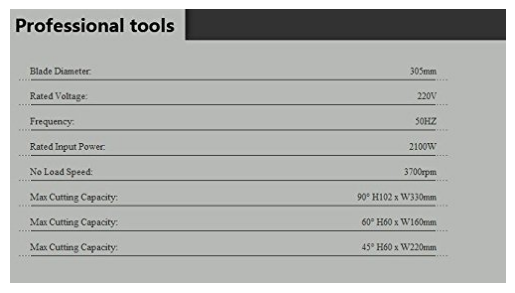

[2024/09/15 09:16:41] ppocr DEBUG: dt_boxes num : 17, elapsed : 0.17224454879760742
[2024/09/15 09:16:41] ppocr DEBUG: cls num  : 17, elapsed : 0.05578732490539551
[2024/09/15 09:16:42] ppocr DEBUG: rec_res num  : 17, elapsed : 0.9649543762207031
Extracted Entity Data: {'length': '220mm', 'width': '220mm', 'depth': '220mm', 'height': '220mm', 'voltage': '220V', 'wattage': '2100W'}


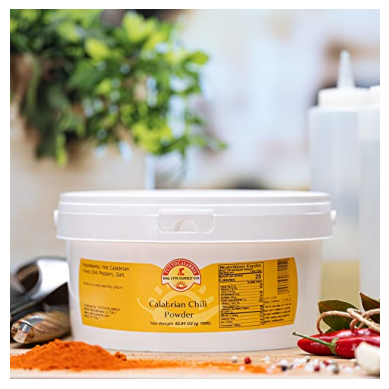

[2024/09/15 09:16:43] ppocr DEBUG: dt_boxes num : 3, elapsed : 0.11957645416259766
[2024/09/15 09:16:43] ppocr DEBUG: cls num  : 3, elapsed : 0.01486349105834961
[2024/09/15 09:16:43] ppocr DEBUG: rec_res num  : 3, elapsed : 0.29422998428344727
Extracted Entity Data: {'item_weight': '52.91OZ'}


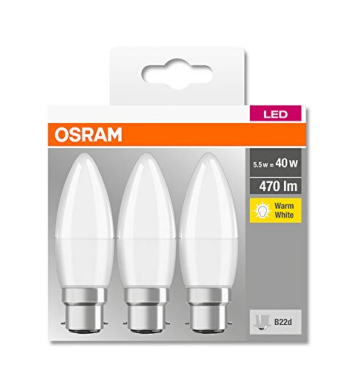

[2024/09/15 09:16:44] ppocr DEBUG: dt_boxes num : 8, elapsed : 0.26912593841552734
[2024/09/15 09:16:44] ppocr DEBUG: cls num  : 8, elapsed : 0.04192852973937988
[2024/09/15 09:16:44] ppocr DEBUG: rec_res num  : 8, elapsed : 0.5616285800933838
Extracted Entity Data: {'wattage': '5.5w', 'volume': '470 l'}


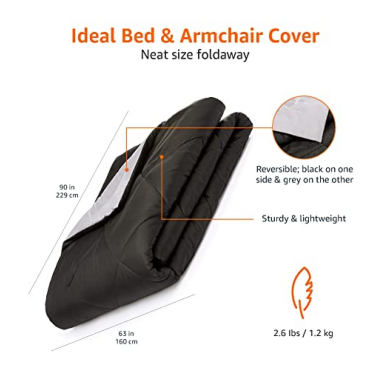

[2024/09/15 09:16:45] ppocr DEBUG: dt_boxes num : 10, elapsed : 0.1694784164428711
[2024/09/15 09:16:45] ppocr DEBUG: cls num  : 10, elapsed : 0.07726430892944336
[2024/09/15 09:16:46] ppocr DEBUG: rec_res num  : 10, elapsed : 1.2778754234313965
Extracted Entity Data: {'length': '160 cm', 'width': '160 cm', 'depth': '160 cm', 'height': '160 cm', 'item_weight': '2.6 lb', 'volume': '2.6 l'}


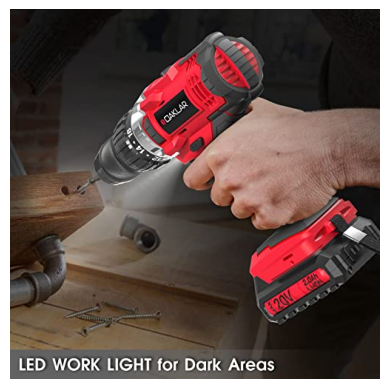

[2024/09/15 09:16:47] ppocr DEBUG: dt_boxes num : 3, elapsed : 0.1176447868347168
[2024/09/15 09:16:47] ppocr DEBUG: cls num  : 3, elapsed : 0.018285751342773438
[2024/09/15 09:16:47] ppocr DEBUG: rec_res num  : 3, elapsed : 0.4034574031829834
Extracted Entity Data: {'voltage': '20V'}


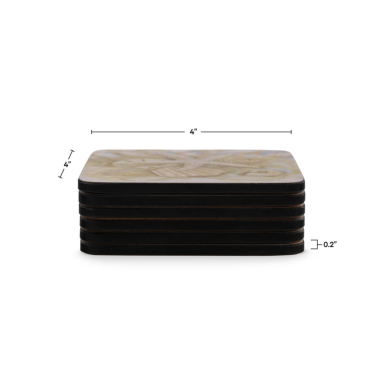

[2024/09/15 09:16:48] ppocr DEBUG: dt_boxes num : 2, elapsed : 0.41410279273986816
[2024/09/15 09:16:48] ppocr DEBUG: cls num  : 2, elapsed : 0.0160977840423584
[2024/09/15 09:16:48] ppocr DEBUG: rec_res num  : 2, elapsed : 0.11126589775085449
Extracted Entity Data: {'length': '0.2"', 'width': '0.2"', 'depth': '0.2"', 'height': '0.2"'}


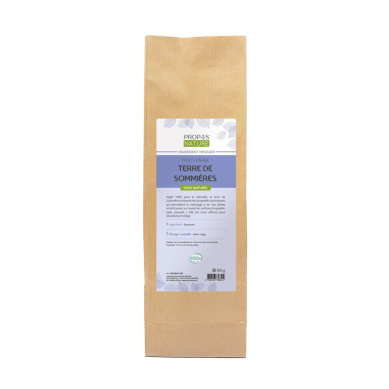

[2024/09/15 09:16:49] ppocr DEBUG: dt_boxes num : 18, elapsed : 0.32172179222106934
[2024/09/15 09:16:49] ppocr DEBUG: cls num  : 18, elapsed : 0.050778865814208984
[2024/09/15 09:16:50] ppocr DEBUG: rec_res num  : 18, elapsed : 1.3697865009307861
Extracted Entity Data: {'item_weight': '500g'}


In [ ]:
#urls = ['https://m.media-amazon.com/images/I/61I9XdN6OFL.jpg']
for image_url in urls:
# Step 1: Download and display the image
  img = download_image(image_url)
  display_image(img)

# Step 2: Run OCR on the image
  ocr_result = ocr.ocr(img)

# Step 3: Extract specific entity values from the OCR result
  extracted_data = extract_info(ocr_result, patterns)

# Step 4: Display the extracted information
  print("Extracted Entity Data:", extracted_data)